<a href="https://colab.research.google.com/github/sugam24/Coding-Neural-Networks-from-scratch/blob/main/2.%20Backprop_in_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Back propagation in neural network

**Back propagation in single neuron**

Problem: How to optimize weights and biases of neuron so that output is close to 0?

We need to find how to update w[0], w[1], w[2], b so that loss is minimized. For this we have to move in negative gradient direction. We have to find derivative of loss w.r.t w[0], w[1], w[2], b.
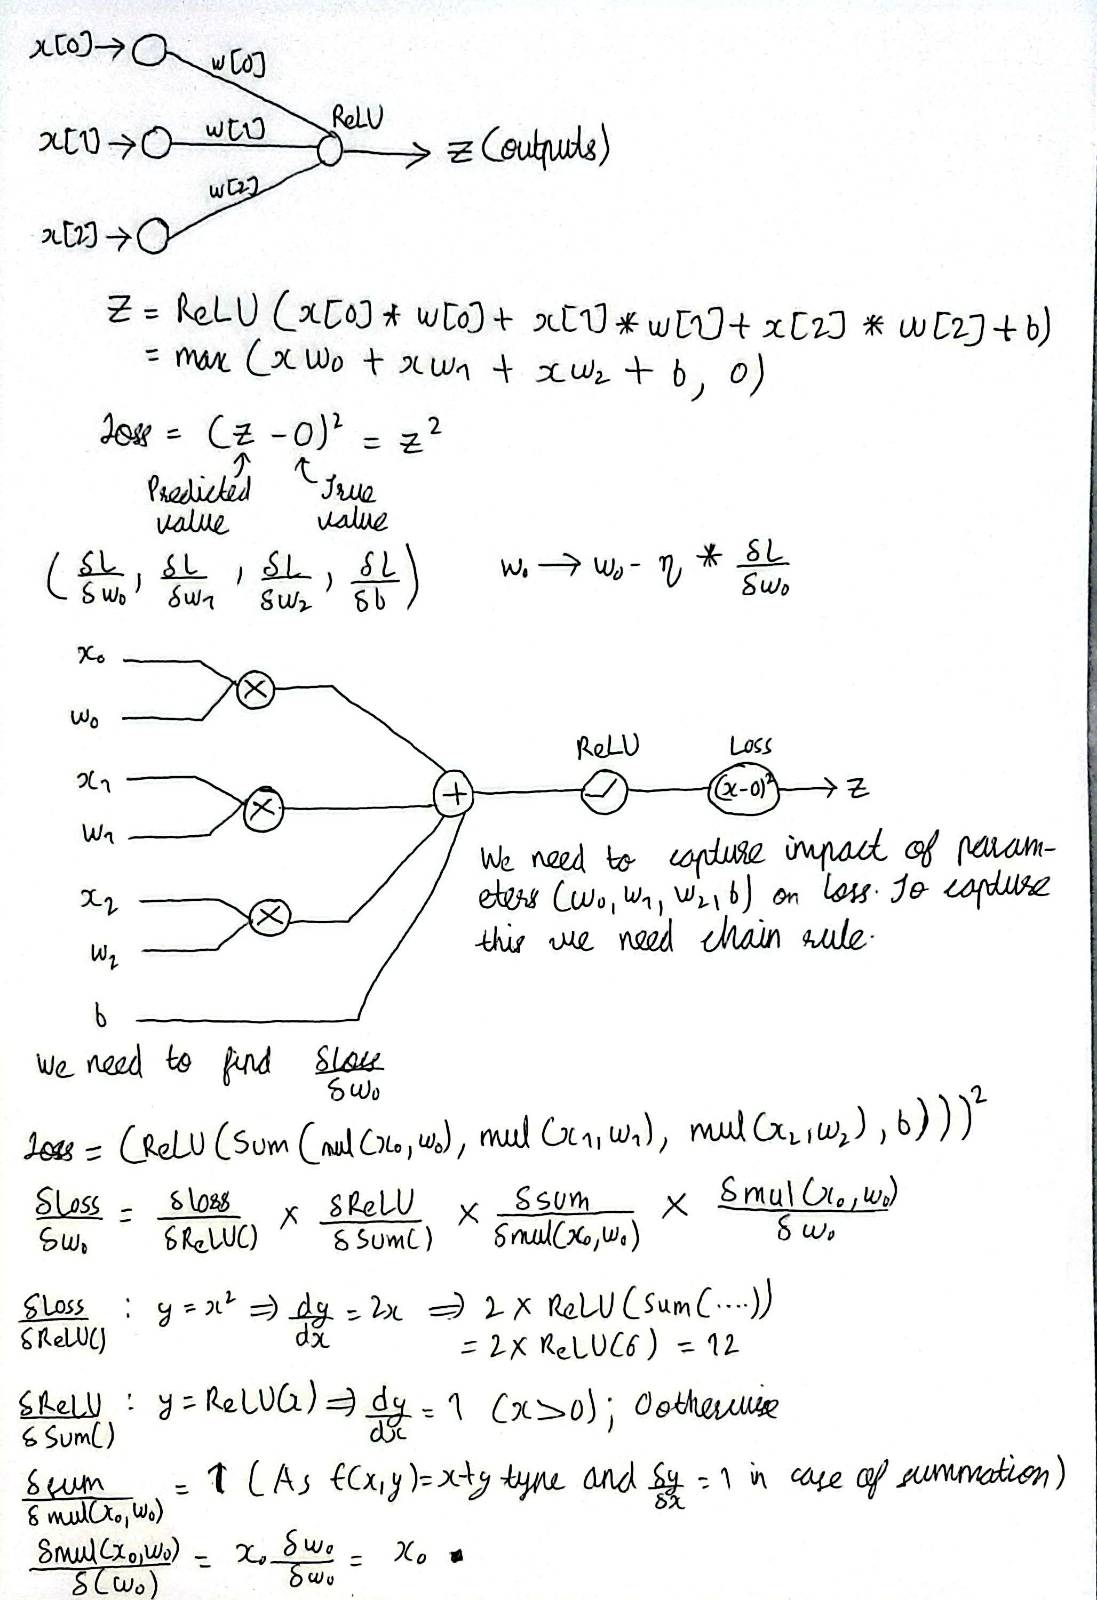

In [ ]:
import numpy as np
weights = np.array([-3.0, -1.0, 2.0])
bias = 1.0
inputs = np.array([1.0, -2.0, 3.0])
target_output = 0.0
learning_rate = 0.001

def relu(x):
  return np.maximum(x, 0)

def relu_derivative(x):
  return np.where(x > 0, 1, 0)

for iteration in range(200):
  #Forward pass
  linear_output = np.dot(weights, inputs) + bias
  output = relu(linear_output)
  loss = (output - target_output) ** 2

  #Backward pass
  dloss_output = 2 * (output - target_output)
  doutput_dlinear = relu_derivative(linear_output)
  dlinear_dweights = inputs
  dlinear_dbias = 1

  dloss_dweights = dloss_output * doutput_dlinear * dlinear_dweights
  dloss_dbias = dloss_output * doutput_dlinear * dlinear_dbias

  #Update weights and biases
  weights -= learning_rate * dloss_dweights
  bias -= learning_rate * dloss_dbias

  #Print loss for this iteration
  print(f"Iteration {iteration + 1}, Loss: {loss}")

print("Final weights: ",weights)
print("Final bias: ",bias)

Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872399999999985
Iteration 3, Loss: 31.870541159999995
Iteration 4, Loss: 29.98699217744401
Iteration 5, Loss: 28.21476093975706
Iteration 6, Loss: 26.54726856821742
Iteration 7, Loss: 24.978324995835766
Iteration 8, Loss: 23.502105988581878
Iteration 9, Loss: 22.113131524656684
Iteration 10, Loss: 20.80624545154949
Iteration 11, Loss: 19.576596345362915
Iteration 12, Loss: 18.419619501351963
Iteration 13, Loss: 17.331019988822064
Iteration 14, Loss: 16.306756707482677
Iteration 15, Loss: 15.343027386070442
Iteration 16, Loss: 14.43625446755368
Iteration 17, Loss: 13.583071828521268
Iteration 18, Loss: 12.780312283455652
Iteration 19, Loss: 12.024995827503426
Iteration 20, Loss: 11.314318574097976
Iteration 21, Loss: 10.645642346368787
Iteration 22, Loss: 10.016484883698395
Iteration 23, Loss: 9.424510627071816
Iteration 24, Loss: 8.867522049011871
Iteration 25, Loss: 8.34345149591527
Iteration 26, Loss: 7.850353512506679
Iteration 27, Loss:

#Back propagation in multiple neurons(layer)
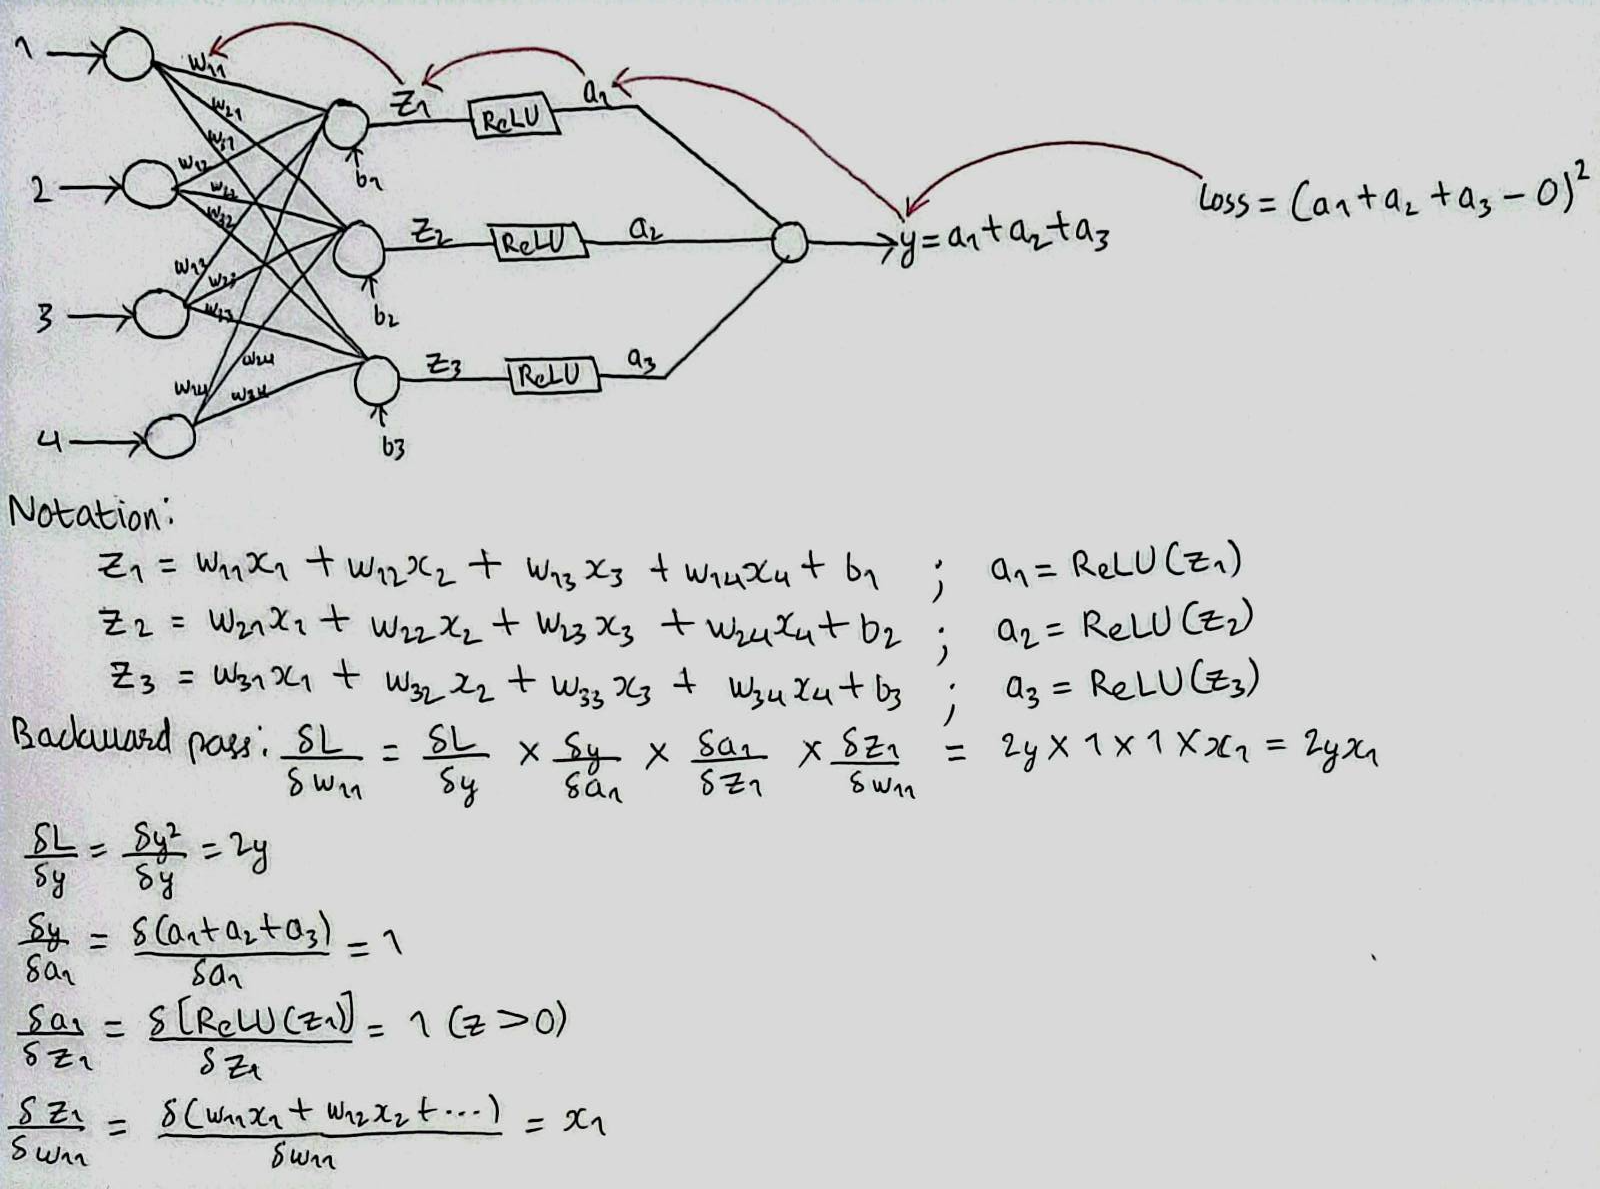

In [ ]:
import numpy as np

#Initial inputs
inputs = np.array([1,2,3,4])

# Initial weights and biases
weights = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8],
    [0.9, 1.0, 1.1, 1.2]
])

biases = np.array([0.1, 0.2, 0.3])

#learning rate
learning_rate = 0.001

#ReLU activation function and its derivative

def relu(x):
  return np.maximum(x, 0)
  # WRONG: np.max(x, 0) → takes max of entire array, returns ONE number
  # Example:
  # x = [2, -5, 4]
  # np.max(x, 0) → max([2, -5, 4]) = 4 → max(4, 0) = 4  (single scalar)

  # RIGHT: np.maximum(x, 0) → applies element-wise
  # Example:
  # x = [2, -5, 4]
  # np.maximum(x, 0) → [2, 0, 4]  (correct ReLU)

def relu_derivative(x):
  return np.where(x>0, 1, 0)

#Training loop
for iteration in range(200):
  #Forward pass
  z = np.dot(weights, inputs) + biases
  a = relu(z)
  y = np.sum(a)

  #Calculate loss
  loss = y**2

  #Backward pass
  #Gradient of loss with respect to output y
  dL_dy = 2*y

  #Gradient of y with respect to a
  dy_da = np.ones_like(a)

  #Gradient of a with respect to z(ReLU derivative)
  da_dz = relu_derivative(z)

  #Gradient of z with respect to weights and biases
  dL_dz = dL_dy * dy_da * da_dz            # <-- Added missing step
  dL_dW = np.outer(dL_dz, inputs)
  dL_dB = dL_dz

  # Update weights and biases
  weights -= learning_rate * dL_dW
  biases -= learning_rate * dL_dB

  # Print the loss every 20 iterations
  if iteration % 20 == 0:
    print(f"Iteration {iteration}, Loss: {loss}")

# Final weights and biases
print("Final weights:\n", weights)
print("Final biases:\n", biases)


Iteration 0, Loss: 466.56000000000006
Iteration 20, Loss: 5.32959636083938
Iteration 40, Loss: 0.41191523404899866
Iteration 60, Loss: 0.031836212079467595
Iteration 80, Loss: 0.002460565465389601
Iteration 100, Loss: 0.000190172825660145
Iteration 120, Loss: 1.4698126966451542e-05
Iteration 140, Loss: 1.1359926717815175e-06
Iteration 160, Loss: 8.779889800154524e-08
Iteration 180, Loss: 6.7858241357822796e-09
Final weights:
 [[-0.00698895 -0.01397789 -0.02096684 -0.02795579]
 [ 0.25975286  0.11950572 -0.02074143 -0.16098857]
 [ 0.53548461  0.27096922  0.00645383 -0.25806156]]
Final biases:
 [-0.00698895 -0.04024714 -0.06451539]
